<a href="https://colab.research.google.com/github/gmurari30/gmurari30/blob/main/MMA_831_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install pycaret

     |████████████████████████████████| 263 kB 6.7 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 6.8 MB 65.5 MB/s 
     |████████████████████████████████| 271 kB 62.3 MB/s 
     |████████████████████████████████| 14.4 MB 58 kB/s 
     |████████████████████████████████| 105 kB 71.6 MB/s 
     |████████████████████████████████| 248 kB 66.2 MB/s 
     |████████████████████████████████| 167 kB 70.2 MB/s 
     |████████████████████████████████| 2.0 MB 63.7 MB/s 
     |████████████████████████████████| 1.7 MB 69.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 1.3 MB 64.9 MB/s 
     |████████████████████████████████| 3.1 MB 65.0 MB/s 
     |████████████████████████████████| 636 kB 67.5 MB/s 
     |███████████████████

In [ ]:
import pandas as pd #to manipulate dataframes
import numpy as np #to manipulate data series
import sklearn #for ML models
import pycaret #for initial model selection
import seaborn as sn #nice library for visuals
import matplotlib.pyplot as plt #to create graphs

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('data_fix_20%_remove_NA.xlsx')
df.head()

Saving data_fix_20%_remove_NA.xlsx to data_fix_20%_remove_NA.xlsx


In [ ]:
df.info()

NameError: ignored

In [ ]:
df['internal_search_events'].sum()

11052

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

Unnamed: 0  Unnamed: 0.1      id  tot_page_views  tot_page_views_l30d  \
0           0         48630  194487               5                    0   
1           1         47973  191915              77                   10   
2           2         28461  113789             340                    2   
3           3         35340  141075              38                    0   
4           4         32716  130913              64                    0   

   tot_page_views_l90d  tot_visits  tot_visits_l30d  tot_visits_l90d  \
0                    0           1                0                0   
1                   77          10                1               10   
2                   53          56                2               14   
3                    7           6                0                3   
4                    0           3                0                0   

   log_in_events  internal_search_events  internal_campaign_events  \
0              5                       0                         0   
1             69                       7                         0   
2            317                       7                         0   
3             30                       0                         0   
4             55                       0                         0   

   find_retailer_events  buy_now_events  download_trial_events  \
0                     0               0                      0   
1                     0               0                      0   
2                     0               0                      0   
3                     0               0                      0   
4                     0               3                      6   

   contact_support_events  support_search_events  get_pricing_events  \
0                       0                      0                   0   
1                       0                      0                   0   
2                       0                      0                   0   
3                       0                      0                   0   
4                       0                      0                   1   

   find_a_partner_events  form_success_events  form_abandon_events  \
0                      0                    0                    0   
1                      0                    2                    1   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    1                    0   

   product_view_events  cart_open_events  cart_add_events  cart_remove_events  \
0                    5                 0                0                   0   
1                   77                 0                0                   0   
2                  347                 0                0                   0   
3                   41                 1                0                   0   
4                   65                 2                1                   0   

   cart_view_events  campaign_view_events  checkout_s1_events  \
0                 0                     0                   5   
1                 0                     2                  77   
2                 5                     3                 340   
3                 2                     0                  39   
4                 0                     0                  64   

   purchase_events  survey_display_events  paid_search_events  \
0                5                      0                   0   
1               77                      0                   0   
2              371                      0                   0   
3               43                      0                   0   
4               65                      0                   0   

   natural_search_events  video_view_events  campaign_src_events  \
0                      0                  0                    0   
1                      6            

In [ ]:
pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)

Unnamed: 0  Unnamed: 0.1    id  tot_page_views  tot_page_views_l30d  \
0               0          9718  9718               5                    0   
1               1          9571  9571              77                   10   
2               2          5703  5703             326                    2   
3               3          7085  7085              38                    0   
4               4          6554  6554              64                    0   
...           ...           ...   ...             ...                  ...   
9996         9996          2887  2887              15                    0   
9997         9997          6859  6859              16                    0   
9998         9998          9396  9396              39                   23   
9999         9999          1445  1445              38                    0   
10000       10000          6804  6804             595                  251   

       tot_page_views_l90d  tot_visits  tot_visits_l30d  tot_visits_l90d  \
0                        0           0                0                0   
1                       77           9                1               10   
2                       53          55                2               14   
3                        7           5                0                3   
4                        0           2                0                0   
...                    ...         ...              ...              ...   
9996                     0           3                0                0   
9997                     0           1                0                0   
9998                    39          10               10               11   
9999                     0          11                0                0   
10000                  425         192               67              132   

       log_in_events  internal_search_events  internal_campaign_events  \
0                  5                       0                         0   
1                 69                       7                         0   
2                301                       7                         0   
3                 30                       0                         0   
4                 55                       0                         0   
...              ...                     ...                       ...   
9996              14                       0                         0   
9997              16                       0                         0   
9998              35                       2                         0   
9999              37                       0                         0   
10000            561                       4                         0   

       find_retailer_events  buy_now_events  download_trial_events  \
0                         0               0                      0   
1                         0               0                      0   
2                         0               0                      0   
3                         0               0                      0   
4                         0               3                      6   
...                     ...             ...                    ...   
9996                      0               0                      0   
9997                      0               0                      0   
9998                      0               0                      0   
9999                      0               0                      5   
10000                     0               0                     10   

       contact_support_events  support_search_events  get_pricing_events  \
0                           0                      0                   0   
1                           0                      0                   0   
2                           0                      0                   0   
3                           0                      0                   0   
4                           0                  

#Model Selection

In [ ]:
from pycaret.classification import * #loading all ML models
s = setup(df, target = 'target', session_id = 123, fix_imbalance=False)   
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.9996  0.1973  0.9200  0.9994   
gbc          Gradient Boosting Classifier    0.9994  0.1972  0.9399  0.9995   
ada                  Ada Boost Classifier    0.9989  0.1816  0.9400  0.9978   
et                 Extra Trees Classifier    0.9907  0.1967  0.6085  0.9884   
lightgbm  Light Gradient Boosting Machine    0.9800  0.1101  0.5880  0.9824   
rf               Random Forest Classifier    0.9789  0.1998  0.3361  0.9712   
lr                    Logistic Regression    0.9730  0.1461  0.2400  0.9467   
svm                   SVM - Linear Kernel    0.9730  0.0000  0.2400  0.9467   
ridge                    Ridge Classifier    0.9724  0.0000  0.2399  0.9467   
knn                K Neighbors Classifier    0.9720  0.1584  0.2591  0.9536   
nb                            Naive Bayes    0.9064  0.1100  0.2305  0.9457   
lda          Linear Discriminant Analysis    0.6303  0.0879  0.3518  0.6809   
qda       Quadratic Discriminant Analysis    0.0103  0.0000  0.1779  0.0004   

              F1   Kappa     MCC  TT (Sec)  
dt        0.9995  0.9919  0.9919     0.307  
gbc       0.9995  0.9895  0.9896    24.519  
ada       0.9983  0.9750  0.9766     2.569  
et        0.9884  0.7879  0.8035     0.825  
lightgbm  0.9809  0.6440  0.6512     1.292  
rf        0.9712  0.3509  0.4498     0.496  
lr        0.9597  0.0000  0.0000     5.974  
svm       0.9597  0.0000  0.0000     0.923  
ridge     0.9594 -0.0008 -0.0014    10.280  
knn       0.9617  0.1198  0.1625     1.919  
nb        0.9120  0.0116  0.0119     0.416  
lda       0.6535  0.1618  0.2048    31.181  
qda       0.0007  0.0013  0.0089    30.333

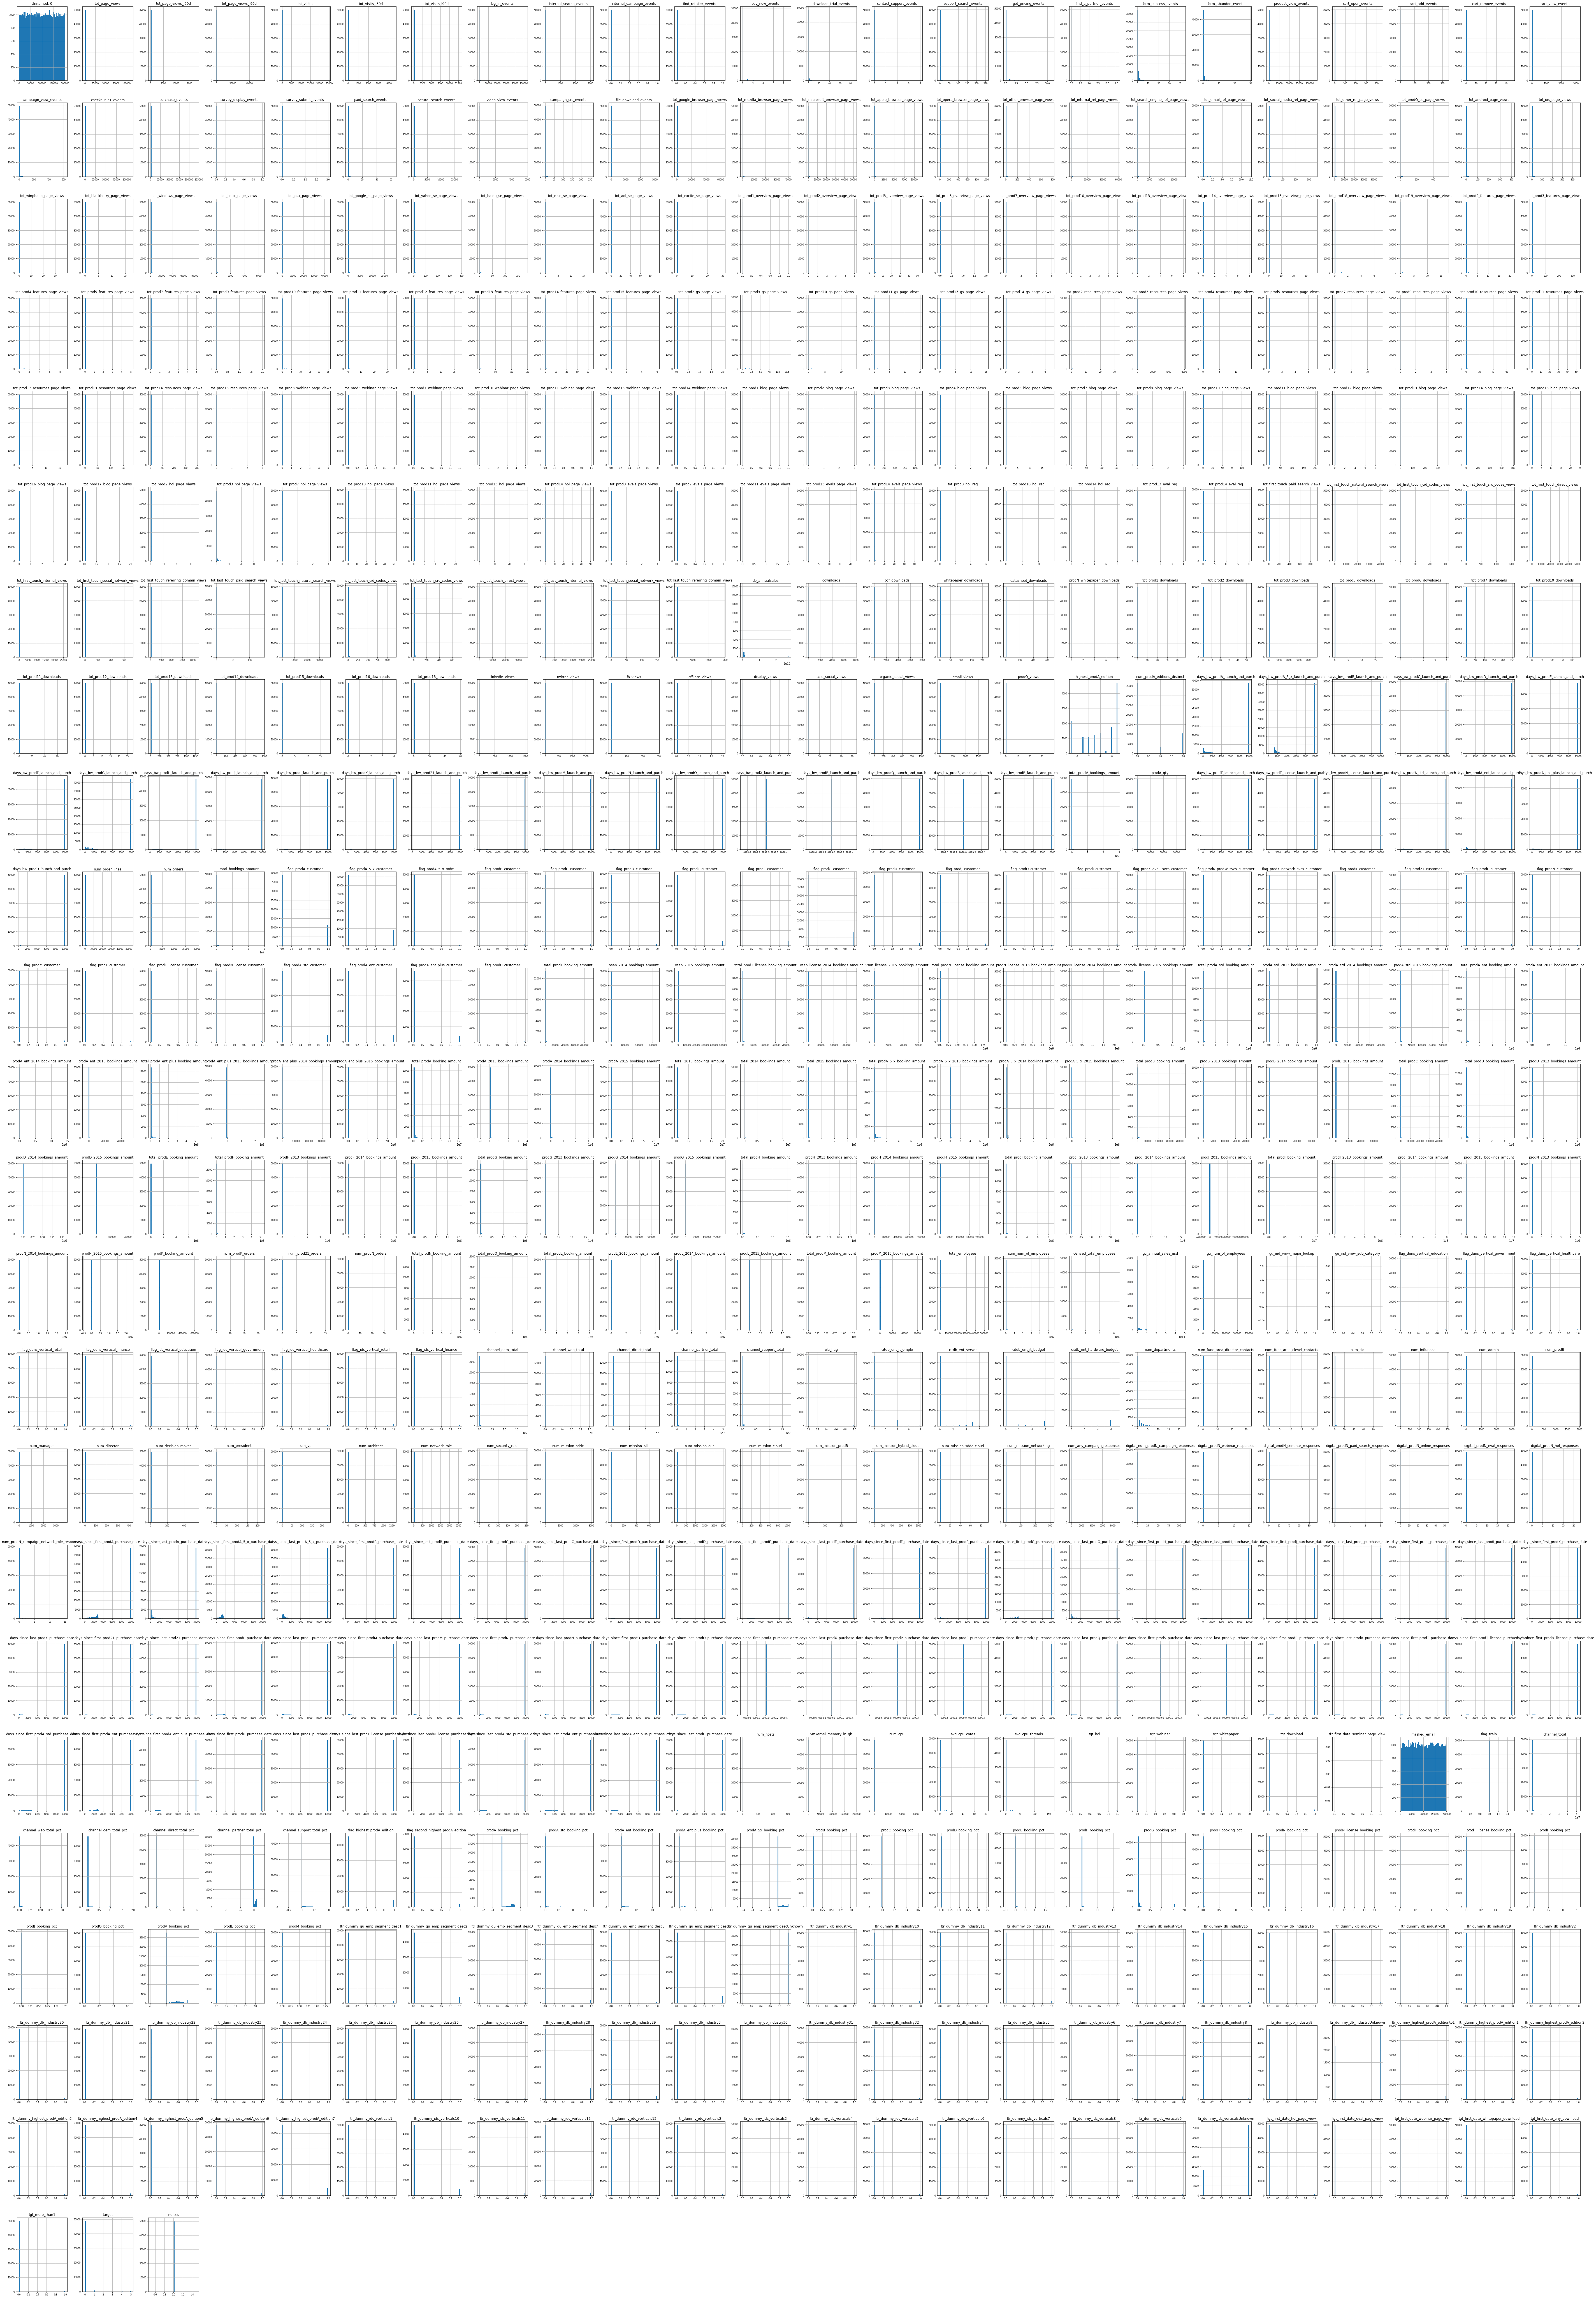

In [ ]:
df.hist(figsize=(100, 150), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

KeyboardInterrupt: ignored

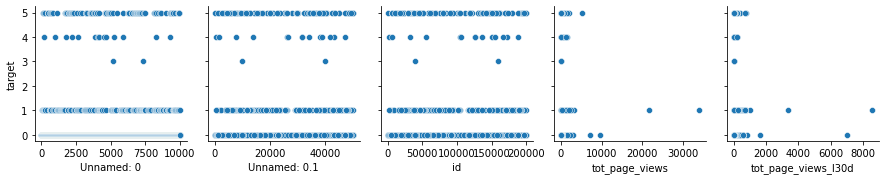

In [ ]:
for i in range(0, len(df.columns), 5):
    sn.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['target'])

In [ ]:
import seaborn as sns #visualisation
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
f, ax = plt.subplots(figsize=(125, 125))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)